# Import Libraries

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from persona_generator import generate_persona_labels

## Read Data

In [3]:
df = pd.read_csv('../processed/processed_customers.csv')
df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partnered,Marital_Status_Single
0,0.234063,0.310532,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.097812,2.377952,1.529129,1.675488,-1.264803,-0.439265,0.986443,-0.158041,0.992806,-0.444062,-0.526530,-1.348829,1.354164
1,-0.234559,-0.380509,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,-0.420530,-1.188411,-0.962358,1.405806,-0.439265,1.236801,-0.158041,0.992806,-0.444062,-0.526530,-1.348829,1.354164
2,0.769478,-0.795134,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-0.420530,-0.205155,0.280250,-1.264803,-0.439265,0.318822,-0.158041,0.992806,-0.444062,-0.526530,0.741384,-0.738463
3,-1.017239,-0.795134,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,-0.420530,-1.059945,-0.919224,0.070501,-0.439265,-1.266777,-0.158041,0.992806,-0.444062,-0.526530,0.741384,-0.738463
4,0.240221,1.554407,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.097812,-0.420530,-0.951244,-0.307044,0.070501,-0.439265,-1.016420,-0.158041,-1.007246,-0.444062,1.899228,0.741384,-0.738463


In [4]:
df_unscaled = pd.read_csv('../processed/processed_customers_unscaled.csv')
df_unscaled.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,1,663,1617,1,0,57
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,113,27,3,0,60
2,Graduation,Partnered,71613.0,26,1,8,2,10,4,0,0,312,776,1,0,49
3,Graduation,Partnered,26646.0,26,2,2,0,4,6,0,0,139,53,2,0,30
4,PhD,Partnered,58293.0,94,5,5,3,6,5,0,0,161,422,2,0,33


# Elbow Method and Silhouette Score

In [6]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, kmeans.labels_))

### Elbow Plot and Silhouette Plots

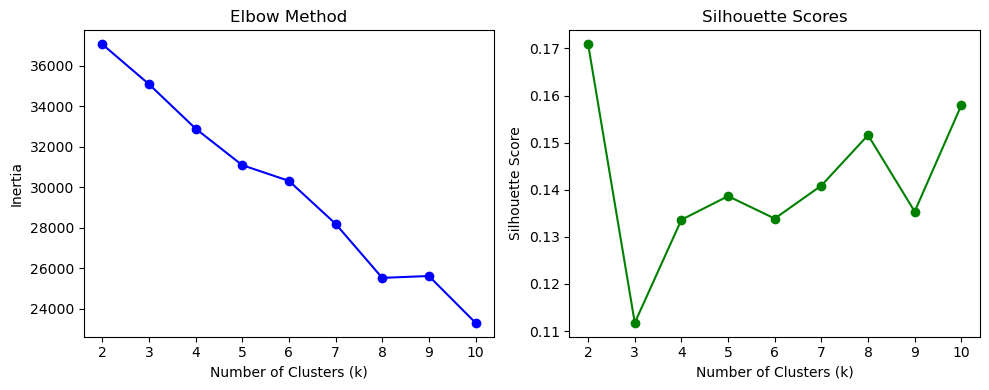

In [8]:
#plot elbow
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

#plot silhouette
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

Let's consider k=2

In [10]:
k = 2
fkmeans = KMeans(n_clusters = k, random_state = 42)
df['Cluster'] = fkmeans.fit_predict(df)

## Visualization of clusters in 3D

Let's try to visualize the clusters in 3D. We will perform dimensionaltiy reduction to 3 dimensions.

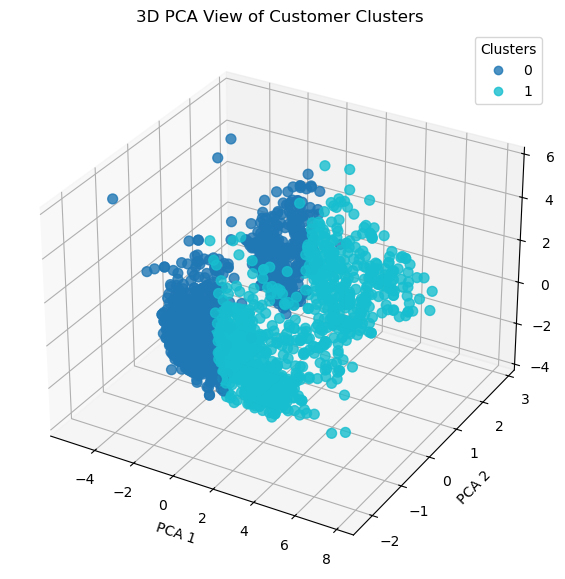

In [13]:
# Reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.drop('Cluster', axis=1))

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                c=df['Cluster'], cmap='tab10', s=50, alpha=0.8)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D PCA View of Customer Clusters")

plt.legend(*sc.legend_elements(), title="Clusters")
plt.show()

In [14]:
df_unscaled['Cluster'] = df['Cluster']
df_unscaled.to_csv('../processed/kmeans.csv', index = False)

In [15]:
print("Customer count in each cluster:")
print(df_unscaled['Cluster'].value_counts())
print("\n")

Customer count in each cluster:
Cluster
0    1263
1     953
Name: count, dtype: int64




# Cluster Summary

In [16]:
cluster_summary = df_unscaled.groupby('Cluster').mean(numeric_only=True)

In [17]:
cluster_std = df_unscaled.groupby('Cluster').std(numeric_only=True)
cluster_std

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age
Cluster,,,,,,,,,,,,,,
0,14148.015181,28.774305,1.969082,2.074099,0.981146,1.631441,1.914078,0.104740,0.290037,200.34921,187.017291,0.697522,0.299201,11.425303
1,23515.604120,29.188657,1.821665,2.621325,2.816495,2.842484,2.147212,0.085434,0.418886,203.78351,454.681052,0.585010,0.908416,12.362271


In [18]:
for cluster in sorted(df_unscaled['Cluster'].unique()):
    print(f"Cluster {cluster} Summary:")
    print(cluster_summary.loc[cluster])
    print("\n---\n")

Cluster 0 Summary:
Income                      37664.256532
Recency                        48.741093
NumDealsPurchases               2.545527
NumWebPurchases                 2.824228
NumCatalogPurchases             0.806809
NumStorePurchases               3.749802
NumWebVisitsMonth               6.488519
Complain                        0.011085
Response                        0.092637
Customer_Tenure               339.475059
Total_Spend                   168.779097
Family_Size                     2.268409
Total_Campaigns_Accepted        0.093428
Age                            43.532858
Name: 0, dtype: float64

---

Cluster 1 Summary:
Income                      71573.927597
Recency                        49.372508
NumDealsPurchases               2.029381
NumWebPurchases                 5.756558
NumCatalogPurchases             5.141658
NumStorePurchases               8.519412
NumWebVisitsMonth               3.769150
Complain                        0.007345
Response                      

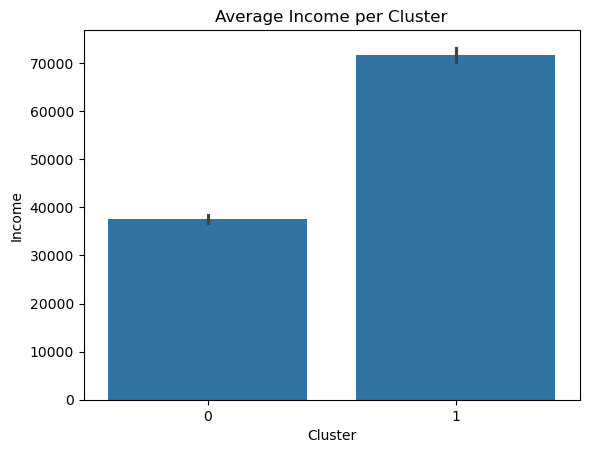

In [19]:
sns.barplot(x='Cluster', y='Income', data=df_unscaled)
plt.title('Average Income per Cluster')
plt.show()

## Insights ranges for each Cluster

In [20]:
# Displaying insight ranges for each cluster
for cluster in cluster_summary.index:
    print(f"\nInsights for Cluster {cluster}:\n")
    print('Range shown as (mean ± std)')
    
    for col in cluster_summary.columns:
        mean = cluster_summary.loc[cluster, col]
        std = cluster_std.loc[cluster, col]
        
        lower = int(round(mean - std))
        upper = int(round(mean + std))

        # Ensure lower is not greater than upper due to small std
        if lower > upper:
            lower, upper = upper, lower
        
        print(f"- {col}: approx. range {lower} to {upper}")
    
    print("\n" + "-"*60)



Insights for Cluster 0:

Range shown as (mean ± std)
- Income: approx. range 23516 to 51812
- Recency: approx. range 20 to 78
- NumDealsPurchases: approx. range 1 to 5
- NumWebPurchases: approx. range 1 to 5
- NumCatalogPurchases: approx. range 0 to 2
- NumStorePurchases: approx. range 2 to 5
- NumWebVisitsMonth: approx. range 5 to 8
- Complain: approx. range 0 to 0
- Response: approx. range 0 to 0
- Customer_Tenure: approx. range 139 to 540
- Total_Spend: approx. range -18 to 356
- Family_Size: approx. range 2 to 3
- Total_Campaigns_Accepted: approx. range 0 to 0
- Age: approx. range 32 to 55

------------------------------------------------------------

Insights for Cluster 1:

Range shown as (mean ± std)
- Income: approx. range 48058 to 95090
- Recency: approx. range 20 to 79
- NumDealsPurchases: approx. range 0 to 4
- NumWebPurchases: approx. range 3 to 8
- NumCatalogPurchases: approx. range 2 to 8
- NumStorePurchases: approx. range 6 to 11
- NumWebVisitsMonth: approx. range 2 to 

## Assign Persona to each Cluster

In [36]:
labels = generate_persona_labels(cluster_summary)

In [40]:
for cluster, label in labels.items():
    print(f"Cluster {cluster}: {label}")

Cluster 0: Middle-Income, Moderate Spender, Complainers, Digital Shoppers, Middle-Aged, Small Households
Cluster 1: Middle-Income, Heavy Spender, Complainers, Digital Shoppers, In-Store Loyalists, Middle-Aged, Small Households
